In [ ]:
 #/media/vk.jpeg

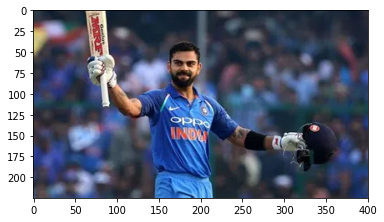

In [ ]:
#week 1
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("/media/vk.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

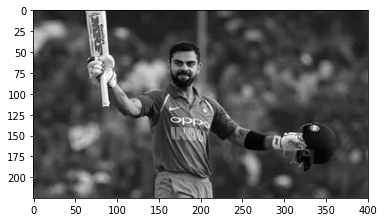

In [ ]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/media/vk.jpeg")

img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
plt.imshow(img)

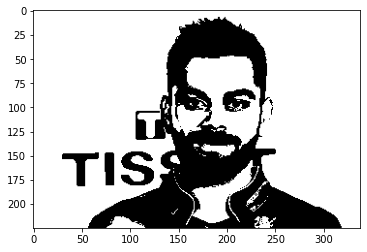

In [ ]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/media/vkk.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
ret,th_img=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(th_img )

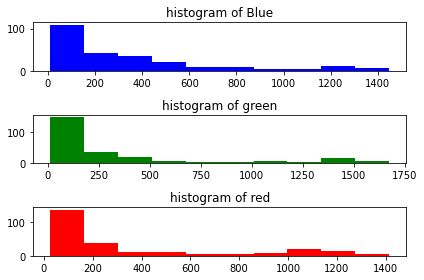

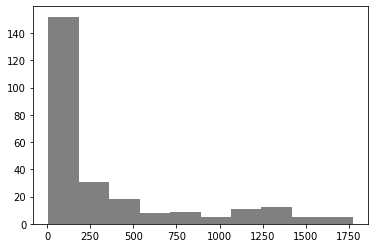

In [ ]:
#week2

import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/media/vk.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

blue=cv2.calcHist([img],[0],None,[256],[0,256])
green=cv2.calcHist([img],[1],None,[256],[0,256])
red=cv2.calcHist([img],[2],None,[256],[0,256])

plt.subplot(3, 1, 1)
plt.title("histogram of Blue")
plt.hist(blue, color="blue")

plt.subplot(3, 1, 2)
plt.title("histogram of green")
plt.hist(green, color="green")

plt.subplot(3, 1, 3)
plt.title("histogram of red")
plt.hist(red, color="red")
plt.tight_layout()
plt.show()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
histg = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.hist(histg, color = "gray")
plt.show()


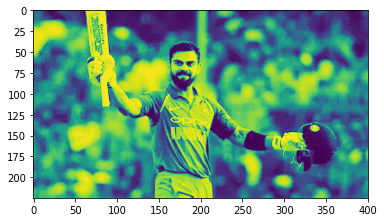

In [ ]:
#week3
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("/media/vk.jpeg")
bray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
equ  = cv2.equalizeHist(bray)

plt.imshow(equ)

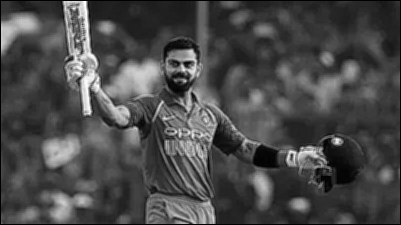

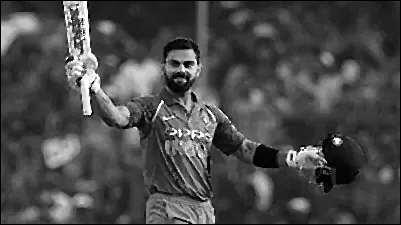

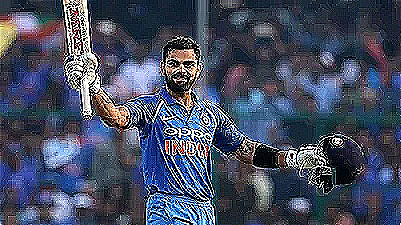

In [ ]:
#week4

import cv2
import numpy as np

from google.colab.patches import cv2_imshow

image = cv2.imread("/media/vk.jpeg",0)

m,n = image.shape

mask = np.ones([3,3],dtype=int)
mask=mask/9
new_img = np.zeros([m,n])

for i in range(1,m-1):
  for j in range(1,n-1):
    temp = mask[0][0]*image[i-1,j-1] + mask[0][1]*image[i-1,j] + mask[0][2]*image[i-1,j+1] + mask[1][0]*image[i,j-1] + mask[1][1]*image[i,j] + mask[1][2]*image[i,j+1] + mask[2][0]*image[i+1,j-1] + mask[2][1]*image[i+1,j] + mask[2][2]*image[i+1,j+1]

    new_img[i,j] = temp
cv2_imshow(new_img)


image = cv2.imread('/media/vk.jpeg',0)

m,n = image.shape
new_img = np.zeros([m,n])

for i in range(1,m-1):
  for j in range(1,n-1):
    lst = [image[i-1,j-1],image[i-1,j],image[i-1,j+1],image[i,j-1],image[i,j],image[i,j+1],image[i+1,j-1],image[i+1,j],image[i+1,j+1]]
    lst.sort()
    new_img[i,j] = lst[4]

cv2_imshow(new_img)

#Sharpening
image = cv2.imread("/media/vk.jpeg")

filter = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

image_sharp = cv2.filter2D(image,-1,filter)
cv2.imwrite("/media/vk.jpeg",image_sharp)
cv2_imshow(image_sharp)



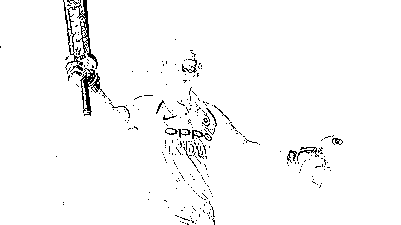

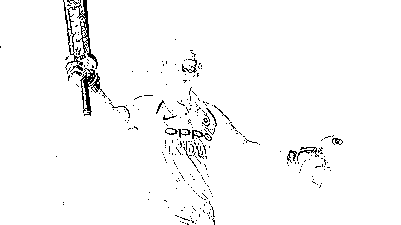

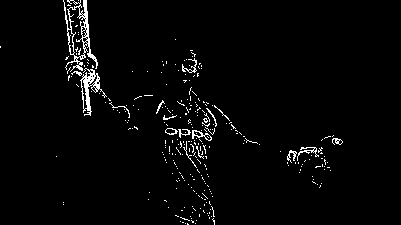

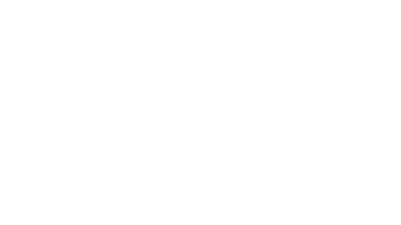

-1

In [ ]:
#week5
import cv2
from google.colab.patches import cv2_imshow
import numpy as np;

im_in = cv2.imread("/media/vk.jpeg", cv2.IMREAD_GRAYSCALE);
th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV);
im_floodfill = im_th.copy()
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
im_out = im_th | im_floodfill_inv

cv2_imshow(im_th)
cv2_imshow(im_floodfill)
cv2_imshow(im_floodfill_inv)
cv2_imshow(im_out)
cv2.waitKey(0)


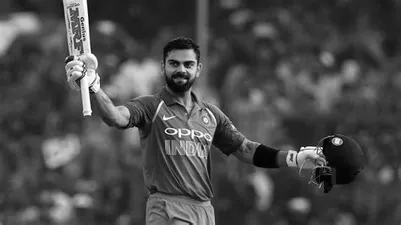

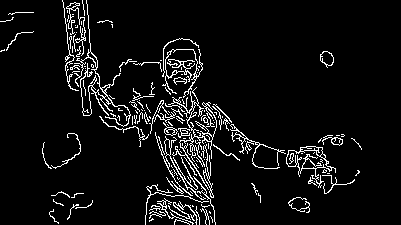

In [ ]:
#week6

image = cv2.imread("/media/vk.jpeg")

image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
edges = cv2.Canny(image,100,200)

cv2_imshow(edges)

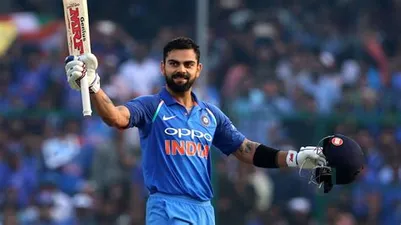

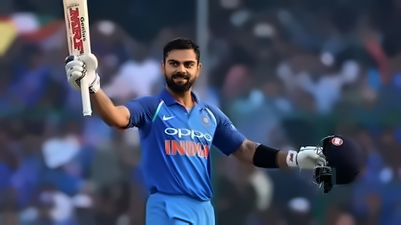

In [ ]:
#week7
img=cv2.imread('/media/vk.jpeg')
im=cv2.fastNlMeansDenoisingColored(img,None,11,6,7,21)
cv2_imshow(img) 
cv2_imshow(im)

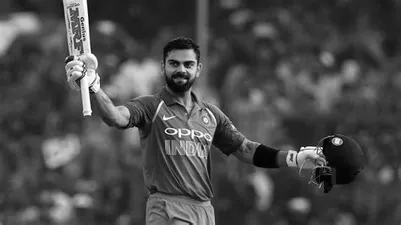

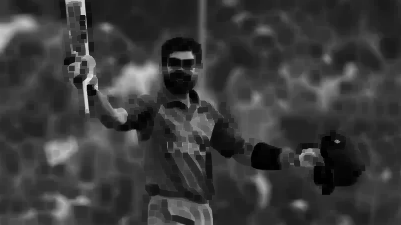

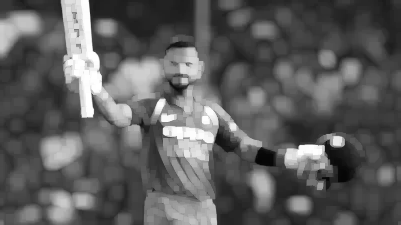

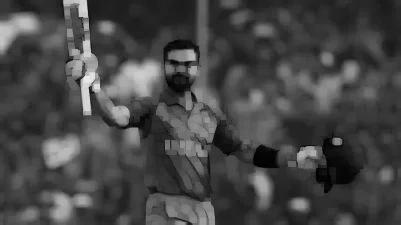

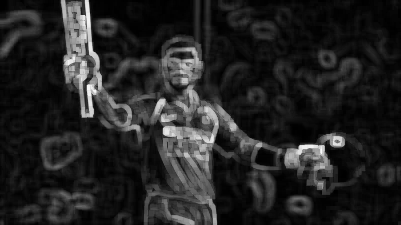

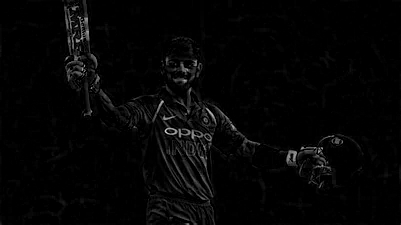

In [ ]:
#week8
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
img = cv.imread('/media/vk.jpeg',0)
kernel = np.ones((5,5),np.uint8)
cv2_imshow(img)

erosion = cv.erode(img,kernel,iterations = 1)
cv2_imshow(erosion)

dilation = cv.dilate(img,kernel,iterations = 1)
cv2_imshow(dilation)

opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
cv2_imshow(opening)

gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
cv2_imshow(gradient)

tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
cv2_imshow(tophat)


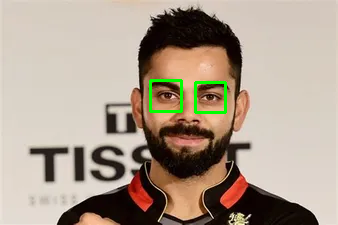

In [20]:
#week9
# EYE DETECTION 

import cv2
from google.colab.patches import cv2_imshow

image_path = "/media/vkk.jpg"
original_image = cv2.imread(image_path)

image_grey = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

cascade_classifier = cv2.CascadeClassifier(f"{cv2.data.haarcascades}haarcascade_eye.xml")
detected_objects = cascade_classifier.detectMultiScale(image_grey)

if len(detected_objects) != 0:
    for (x, y, width, height) in detected_objects:
        cv2.rectangle(original_image, (x, y),
                      (x + height, y + width),
                      (0, 255, 0), 2)

cv2_imshow(original_image)

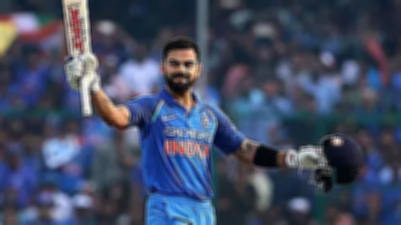

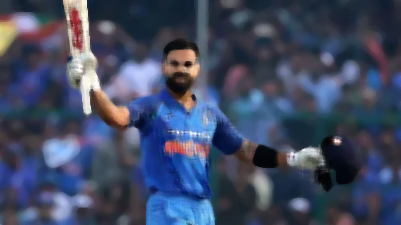

In [ ]:
#week10
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/media/vk.jpeg')
#gaussian filter
im= cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
cv2_imshow(im)
#median Filter
im2=cv2.medianBlur(img,7)
cv2_imshow(im2)
